In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt

This is the list of all the files present in the path given to us:

['blacephalon.jpg', 'bibarel.png', 'avalugg.png', 'cinccino.png', 'armaldo.png', 'alomomola.png', 'budew.png', 'bellsprout.png', 'chandelure.png', 'buneary.png', 'alakazam.png', 'aurorus.png', 'darumaka.png', 'castform.png', 'blitzle.png', 'beartic.png', 'cloyster.png', 'azurill.png', 'arbok.png', 'ambipom.png', 'carracosta.png', 'azelf.png', 'cleffa.png', 'cherrim.png', 'bidoof.png', 'cyndaquil.png', 'clefable.png', 'bulbasaur.png', 'chatot.png', 'cradily.png', 'ariados.png', 'deino.png', 'charizard.png', 'boldore.png', 'cacnea.png', 'archen.png', 'blastoise.png', 'chesnaught.png', 'breloom.png', 'cacturne.png', 'dewott.png', 'deerling.png', 'delcatty.png', 'darmanitan-standard.png', 'clefairy.png', 'corphish.png', 'crabrawler.jpg', 'anorith.png', 'dhelmise.jpg', 'barbaracle.png', 'baltoy.png', 'caterpie.png', 'cascoon.png', 'dartrix.jpg', 'cottonee.png', 'bonsly.png', 'cubchoo.png', 'archeops.png', 'bayleef.png', 'co

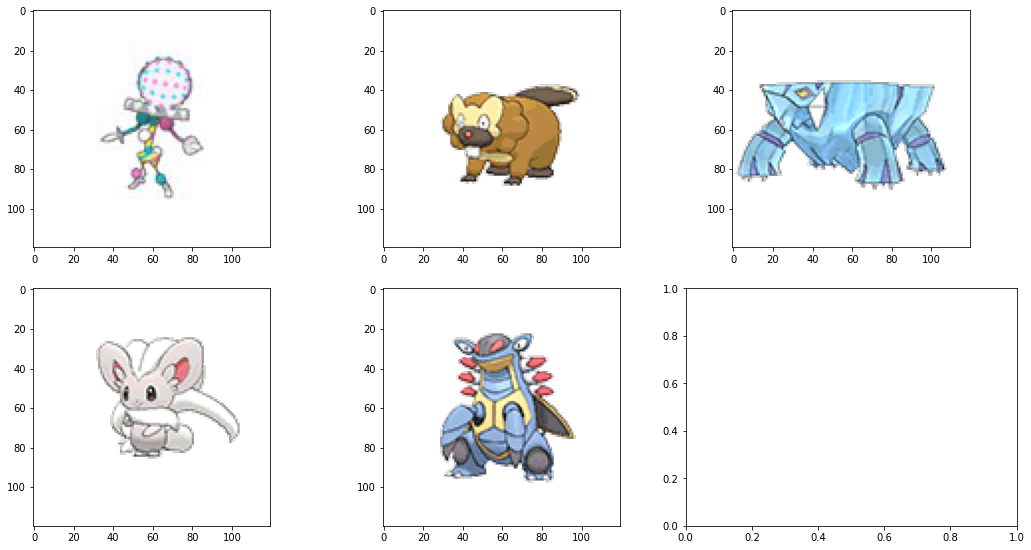

In [ ]:
from PIL import Image

root_dir = "/content/drive/My Drive/pokemon_dataset/images/images"

files =  os.path.join(root_dir)
File_names = os.listdir(files)
print("This is the list of all the files present in the path given to us:\n")
print(File_names)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = File_names[0:6]

def subplots():
    i = 0
    j = 0
    k = 0
    for k in range(5):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);
    
subplots()

In [ ]:
data = pd.read_csv("/content/drive/My Drive/pokemon_dataset/pokemon.csv")

data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [ ]:
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
print(data_dict)

{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [ ]:
labels = data["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [ ]:
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [ ]:
final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)
for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY) 
    label = labels_idx[data_dict[file.split(".")[0]]] 
    final_images.append(np.array(img))
    final_labels.append(np.array(label))
    
final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 43200)             0         
                                                                 
 dense (Dense)               (None, 100)               4320100   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 18)                1818      
                                                                 
Total params: 4,342,118
Trainable params: 4,342,118
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(final_images, final_labels, epochs=50)

Epoch 1/50
26/26 [==============================] - 3s 5ms/step - loss: 4.2844 - accuracy: 0.0853
Epoch 2/50
26/26 [==============================] - 0s 5ms/step - loss: 2.8354 - accuracy: 0.1595
Epoch 3/50
26/26 [==============================] - 0s 5ms/step - loss: 2.7150 - accuracy: 0.1891
Epoch 4/50
26/26 [==============================] - 0s 5ms/step - loss: 2.5699 - accuracy: 0.2373
Epoch 5/50
26/26 [==============================] - 0s 5ms/step - loss: 2.3359 - accuracy: 0.2818
Epoch 6/50
26/26 [==============================] - 0s 5ms/step - loss: 2.1878 - accuracy: 0.3226
Epoch 7/50
26/26 [==============================] - 0s 5ms/step - loss: 2.0214 - accuracy: 0.3758
Epoch 8/50
26/26 [==============================] - 0s 5ms/step - loss: 1.8567 - accuracy: 0.4227
Epoch 9/50
26/26 [==============================] - 0s 5ms/step - loss: 1.6231 - accuracy: 0.5130
Epoch 10/50
26/26 [==============================] - 0s 5ms/step - loss: 1.4634 - accuracy: 0.5600
Epoch 11/50
26/26 [


 [0.14326686 0.06001034 0.1015724  0.10737294 0.12746736 0.0689482
 0.04467164 0.02533424 0.01129299 0.04708425 0.06706881 0.05554391
 0.04351427 0.00146524 0.03842686 0.01098622 0.0446754  0.00129809]

Typ pokemona: Fire 
dokładność modelu 0.9060568809509277


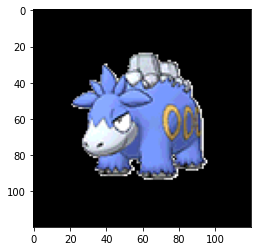

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(final_images)

number = 132
print("\n",predictions[0])
id = np.argmax(predictions[number])
plt.imshow(final_images[number])
print("\nTyp pokemona: {} ".format(labels[id]))
print("dokładność modelu",history.history['accuracy'][-1])